In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error ,r2_score, root_mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import  GradientBoostingRegressor

In [4]:
file_paths = [
    "D:\\ML Predictions\\AirPollutionUI\\air-pollution-ml\\flask-server\\AllPM_merged\\2021_merged_phora_newest.csv",
    "D:\\ML Predictions\\AirPollutionUI\\air-pollution-ml\\flask-server\\AllPM_merged\\2022_merged_phora_newest.csv",
    "D:\\ML Predictions\\AirPollutionUI\\air-pollution-ml\\flask-server\\AllPM_merged\\2023_merged_phora_newest.csv"
]

dataframes = [pd.read_csv(file) for file in file_paths]
combined_data = pd.concat(dataframes, ignore_index=True)
combined_data


,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,...,Conc. Unit,Duration,QC Name,time,Temperature (°C),dewpoint_2m,Relative Humidity (%),Precipitation (mm),windspeed_10m,Pressure (hPa)
0,Phora Durbar Kathmandu,PM2.5 - Principal,2021-01-01 02:00 AM,2021,1,1,2,177.2,227,Very Unhealthy,...,UG/M3,1 Hr,Valid,2021-01-01 02:00:00,6.2,-3.7,49.0,0.0,5.5,1017.9
1,Phora Durbar Kathmandu,PM2.5 - Principal,2021-01-01 03:00 AM,2021,1,1,3,156.1,207,Very Unhealthy,...,UG/M3,1 Hr,Valid,2021-01-01 03:00:00,11.4,-2.0,39.0,0.0,4.5,1019.1
2,Phora Durbar Kathmandu,PM2.5 - Principal,2021-01-01 04:00 AM,2021,1,1,4,132.0,190,Unhealthy,...,UG/M3,1 Hr,Valid,2021-01-01 04:00:00,15.5,-5.4,23.0,0.0,1.8,1019.7
3,Phora Durbar Kathmandu,PM2.5 - Principal,2021-01-01 05:00 AM,2021,1,1,5,113.0,181,Unhealthy,...,UG/M3,1 Hr,Valid,2021-01-01 05:00:00,17.2,-6.8,19.0,0.0,4.5,1018.9
4,Phora Durbar Kathmandu,PM2.5 - Principal,2021-01-01 06:00 AM,2021,1,1,6,107.0,178,Unhealthy,...,UG/M3,1 Hr,Valid,2021-01-01 06:00:00,18.5,-6.7,17.0,0.0,6.3,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24731,Phora Durbar Kathmandu,PM2.5 - Principal,2023-12-30 01:00 AM,2023,12,30,1,64.5,156,Unhealthy,...,UG/M3,1 Hr,Valid,2023-12-30 01:00:00,7.7,5.5,86.0,0.0,4.0,1019.2
24732,Phora Durbar Kathmandu,PM2.5 - Principal,2023-12-30 02:00 AM,2023,12,30,2,72.2,160,Unhealthy,...,UG/M3,1 Hr,Valid,2023-12-30 02:00:00,8.0,5.9,86.0,0.0,5.5,1019.7
24733,Phora Durbar Kathmandu,PM2.5 - Principal,2023-12-30 03:00 AM,2023,12,30,3,91.6,170,Unhealthy,...,UG/M3,1 Hr,Valid,2023-12-30 03:00:00,11.8,8.3,79.0,0.0,5.9,1020.1
24734,Phora Durbar Kathmandu,PM2.5 - Principal,2023-12-30 04:00 AM,2023,12,30,4,65.3,156,Unhealthy,...,UG/M3,1 Hr,Valid,2023-12-30 04:00:00,15.6,7.8,60.0,0.0,1.5,1020.4


In [10]:
combined_data1 = combined_data.drop(columns=['Site','Parameter','Date (LT)','Conc. Unit', 'Duration', 'QC Name', 'time'])
combined_data_final = combined_data1.dropna()
combined_data_final


,Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Temperature (°C),dewpoint_2m,Relative Humidity (%),Precipitation (mm),windspeed_10m,Pressure (hPa)
0,2021,1,1,2,177.2,227,Very Unhealthy,156.0,6.2,-3.7,49.0,0.0,5.5,1017.9
1,2021,1,1,3,156.1,207,Very Unhealthy,135.0,11.4,-2.0,39.0,0.0,4.5,1019.1
2,2021,1,1,4,132.0,190,Unhealthy,108.0,15.5,-5.4,23.0,0.0,1.8,1019.7
3,2021,1,1,5,113.0,181,Unhealthy,94.0,17.2,-6.8,19.0,0.0,4.5,1018.9
4,2021,1,1,6,107.0,178,Unhealthy,101.0,18.5,-6.7,17.0,0.0,6.3,1018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24731,2023,12,30,1,64.5,156,Unhealthy,59.0,7.7,5.5,86.0,0.0,4.0,1019.2
24732,2023,12,30,2,72.2,160,Unhealthy,80.0,8.0,5.9,86.0,0.0,5.5,1019.7
24733,2023,12,30,3,91.6,170,Unhealthy,111.0,11.8,8.3,79.0,0.0,5.9,1020.1
24734,2023,12,30,4,65.3,156,Unhealthy,39.0,15.6,7.8,60.0,0.0,1.5,1020.4


In [11]:
numerical_dataset = combined_data_final[['Month','Day', 'Hour', 'Temperature (°C)', 'dewpoint_2m', 'Relative Humidity (%)', 'Precipitation (mm)', 'windspeed_10m', 'Pressure (hPa)', 'AQI']]

Q1 = numerical_dataset.quantile(0.25) #first 25% of the data
Q3 = numerical_dataset.quantile(0.75) #first 75% of the data
IQR = Q3 - Q1 #IQR = InterQuartile Range

scale = 1.4 #May need to play with this value to modify outlier detection sensitivity if need be
lower_lim = Q1 - scale*IQR
upper_lim = Q3 + scale*IQR

cols = numerical_dataset.columns[0:] # Look for oulierts in columns starting from CO(GT)

#Mask a masking condition that removes rows that have values above/below IQR limits
condition = ~((numerical_dataset[cols] < lower_lim) | (numerical_dataset[cols] > upper_lim)).any(axis=1)

#Generate new dataframe that has had its outliers removed
dataset_filtered = numerical_dataset[condition]

dataset_filtered


,Month,Day,Hour,Temperature (°C),dewpoint_2m,Relative Humidity (%),Precipitation (mm),windspeed_10m,Pressure (hPa),AQI
0,1,1,2,6.2,-3.7,49.0,0.0,5.5,1017.9,227
1,1,1,3,11.4,-2.0,39.0,0.0,4.5,1019.1,207
8,1,1,10,16.9,3.2,40.0,0.0,7.6,1015.6,221
9,1,1,11,15.3,4.5,49.0,0.0,4.0,1015.9,198
10,1,1,12,13.9,5.2,56.0,0.0,4.9,1016.3,191
...,...,...,...,...,...,...,...,...,...,...
24731,12,30,1,7.7,5.5,86.0,0.0,4.0,1019.2,156
24732,12,30,2,8.0,5.9,86.0,0.0,5.5,1019.7,160
24733,12,30,3,11.8,8.3,79.0,0.0,5.9,1020.1,170
24734,12,30,4,15.6,7.8,60.0,0.0,1.5,1020.4,156


In [12]:
from sklearn.preprocessing import StandardScaler

X = dataset_filtered.drop(columns=['AQI'])   #Replace 'AQI' with the name of your target column
y = dataset_filtered['AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train

,Month,Day,Hour,Temperature (°C),dewpoint_2m,Relative Humidity (%),Precipitation (mm),windspeed_10m,Pressure (hPa)
537,1,23,12,13.8,6.7,62.0,0.0,4.5,1011.5
16362,11,22,19,10.3,8.5,89.0,0.0,1.8,1014.5
12611,6,18,16,20.3,19.0,92.0,0.1,3.2,1006.1
12902,6,30,22,18.8,18.7,99.0,0.0,1.8,1003.9
8372,12,22,17,9.1,2.2,62.0,0.0,1.5,1016.0
...,...,...,...,...,...,...,...,...,...
14963,9,25,5,25.5,20.0,72.0,0.1,3.3,1010.9
15756,10,28,7,19.8,12.9,64.0,0.2,6.3,1015.7
7581,11,19,8,20.6,10.6,53.0,0.0,7.4,1009.9
1018,2,12,19,10.2,8.6,90.0,0.0,2.3,1016.2


In [6]:
example_features = {
    "Month": '1',
    "Day": '1',
    "Hour": '2',
    "Temperature (°C)": '13',
    "dewpoint_2m": '5.6',
    "Relative Humidity (%)": '91',
    "Precipitation (mm)": '2',
    "windspeed_10m": '6.6',
    "Pressure (hPa)": '1014.7'
}

input_data = pd.DataFrame([example_features])
input_data

,Month,Day,Hour,Temperature (°C),dewpoint_2m,Relative Humidity (%),Precipitation (mm),windspeed_10m,Pressure (hPa)
0,1,1,2,13,5.6,91,2,6.6,1014.7


In [ ]:
#Training the Gradient Boosting Regressor model

model = GradientBoostingRegressor(
    n_estimators=1500,
    learning_rate=0.025,
    max_depth=12,
    subsample=0.9,
    min_samples_leaf=6,
    min_samples_split=3,
    random_state=42
)


model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.025, max_depth=12, min_samples_leaf=6,
                          min_samples_split=3, n_estimators=1500,
                          random_state=42, subsample=0.9)

In [ ]:
#Evaluating the model

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Sqaure Error (MAE):", rmse)
print("R^2 Score:", r2)


print(y_pred)
print(len(y_pred))


Mean Absolute Error (MAE): 11.399560149469284
Root Mean Sqaure Error (MAE): 16.325933507578473
R^2 Score: 0.8824318918407404
[ 58.50168696 129.75977354 168.02286201 ...  54.95033455  73.38931279
 161.66402419]
3900


In [ ]:
#Testing ...

x_data_new = [['06','7', '20', '20', '5.6', '91', '2', '6.6', '1014.7']]
scaled_input = scaler.transform(x_data_new)
prediction = model.predict(scaled_input)
print(prediction)


[96.35344048]


d:\ML Predictions\AirPollutionUI\air-pollution-ml\flask-server\MLVEnvAirPollution\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


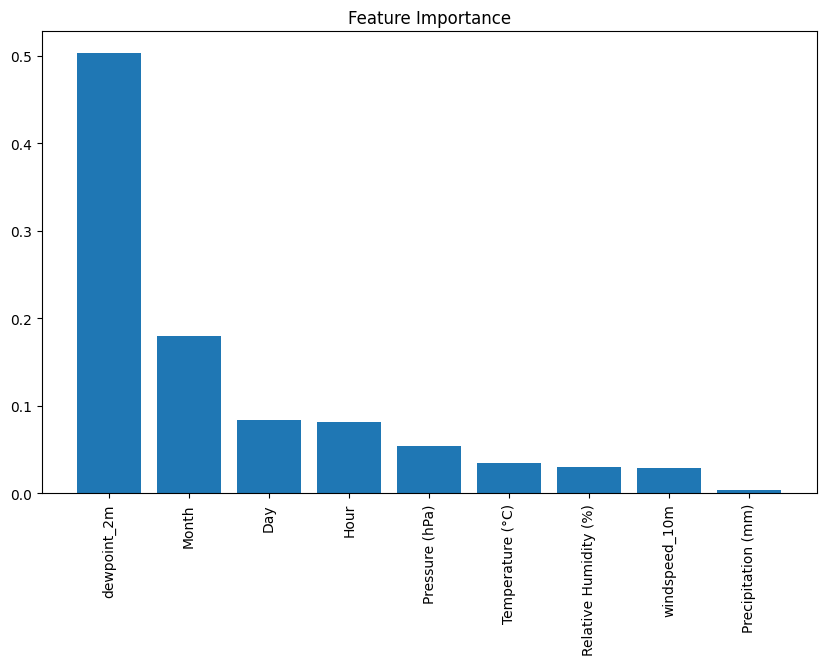

In [ ]:
#Feature Importance Plot

import matplotlib.pyplot as plt
import numpy as np
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.show()

In [ ]:
#Saving the model and scaler and pickle files

import pickle

with open("AQI_GBM_phora_newest.pkl", "wb") as f:
    pickle.dump(model, f)

with open("Scaler_GBM_phora_newest.pkl", "wb") as f:
    pickle.dump(scaler, f)



In [ ]:
#Testing ....

import pickle
with open('AQI_Gradient_Boosting.pkl', 'rb') as file:
    aqi_model = pickle.load(file)

x_data_new_aqi = [['12','14', '3', '8.9695', '7.253523', '89.0', '0', '0.72000', '1020.900024']]
scaled_input_aqi = scaler.transform(x_data_new_aqi)
prediction_aqi = aqi_model.predict(scaled_input_aqi)
prediction_aqi



d:\ML Predictions\AirPollutionUI\air-pollution-ml\flask-server\MLVEnvAirPollution\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([152.63600028])

In [ ]:
#Testing....

from pages.charts import send_features

f = send_features()
f
scaled_input_aqi = scaler.transform(f)
prediction_aqi = model.predict(scaled_input_aqi)
prediction_aqi

     Month  Day  Hour  Temperature (°C)  dewpoint_2m  Relative Humidity (%)  \
0       12   15     0          3.319500     3.319500                  100.0   
1       12   15     1          2.819500     2.819500                  100.0   
2       12   15     2          4.019500     3.876371                   99.0   
3       12   15     3          8.069500     5.699734                   85.0   
4       12   15     4         11.119500     6.658487                   74.0   
..     ...  ...   ...               ...          ...                    ...   
163     12   21    19         10.119500     8.387879                   89.0   
164     12   21    20          9.869500     8.141286                   89.0   
165     12   21    21          9.469500     7.746729                   89.0   
166     12   21    22          8.669499     7.282255                   91.0   
167     12   21    23          7.819500     6.757869                   93.0   

     Precipitation (mm)  windspeed_10m  Pressure (h

array([174.39082415, 155.46283711, 154.2605354 , 142.94395823,
       134.82961986, 140.20251398, 148.8643138 , 139.04384463,
       143.95398905, 157.94886002, 161.02138803, 160.96030294,
       154.00344607, 130.15687753, 115.79719608, 104.9104922 ,
       100.53851811,  99.64392469, 103.05909292, 109.26055999,
       131.95082565, 151.11050874, 158.68795002, 168.74598522,
       164.5017956 , 163.81293317, 165.31636015, 153.74767788,
       142.92194313, 145.78137684, 151.25147356, 146.12077054,
       153.06234105, 162.71488626, 170.25777264, 172.03720474,
       165.91563128, 146.91829736, 127.89026997,  96.65931384,
        85.24804475,  90.52530085,  91.92908327, 116.93241056,
       133.04626959, 154.53987052, 163.36637258, 165.16494282,
       166.41982136, 165.54325605, 163.05656965, 163.08555422,
       163.99705283, 152.64890456, 157.03349019, 156.84606789,
       163.27706443, 170.13003301, 172.41432523, 172.28590759,
       172.043163  , 162.68952062, 121.00115886, 105.50